In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *
from ATS.stats import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots online
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

2021-09-15 15:06:20.547529: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-15 15:06:20.547569: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<Item title:"Riparian_Tree_Census_2020_2021" type:Feature Layer Collection owner:Anooshi>
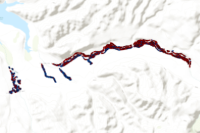

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('c2b05f4abe584e5db8c90ce8c20b9efc')
data = output['data0']
feature_service = output['feature_service']

In [3]:
# Subset data for desired year.
data.rename(columns={"Survey_Date": "Observation_Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(data,sYear)
sub.head()

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 1918


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Zone,Habitat_Type,Tree_Species,Alive_or_Dead,GlobalID,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,Alive_Dead,SurveyYear,SHAPE
5520,6030,2021-06-18 07:00:00,Roger Stephens,None,NaN,,Platanus racemosa,Alive,5a2960bd-f1ae-43c5-a93f-71470cc9a3b0,Symbol Test,,0.0,0.0,NaN,2020-2021,None
5521,6031,2021-06-18 07:00:00,Roger Stephens,None,NaN,,Aesculus californica,Dead,7bfbcee8-c9b0-4fa6-8d51-dcf390863174,Symbol Test,,0.0,0.0,NaN,2020-2021,None
5522,6034,2021-06-22 16:47:01,Kurt Lutz,Brian Creeks,NaN,None,Platanus racemosa,Alive,c568218e-9ade-472d-a666-58e25a51f25b,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191111.777040266, ""y"": 2037129.44417156..."
5523,6035,2021-06-22 16:49:56,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,481b0165-d921-4d8d-a62b-1175668786a1,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191098.147141921, ""y"": 2037248.24407828..."
5524,6036,2021-06-22 16:55:51,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,0247c36c-9c97-46a9-855c-55d560ea63e6,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191094.850555138, ""y"": 2037323.65338103..."


In [4]:
# Validate domains
validate_domains(feature_service)



Table/Layer:  RiparianTreeCensus_2020_2021


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,"{Janel Mayo, Ryan Swanson, Richard Graham-Bruno}"
0,Surveyor_2,"{Ryan Swanson, Richard Graham-Bruno}"
0,Zone,"{nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, ...}"
0,Habitat_Type,{}


In [5]:
# Check for white spaces

QAQC_whitespace(data, ['Comments'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: SurveyYear
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: ESRIGNSS_RECEIVER
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Alive_or_Dead
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Tree_Species
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Habitat_Type
No \xa0 characters found


In [6]:
# QAQC Find blank entries
find_blank_entries(sub, exclude_cols=['Surveyor_2','Comments','ESRIGNSS_H_RMS','ESRIGNSS_RECEIVER','ESRIGNSS_AVG_H_RMS'])

No blank SurveyYear
Blank Alive_Dead entrie(s) exist!


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Zone,Habitat_Type,Tree_Species,Alive_or_Dead,GlobalID,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,Alive_Dead,SurveyYear,SHAPE
5520,6030,2021-06-18 07:00:00,Roger Stephens,None,NaN,,Platanus racemosa,Alive,5a2960bd-f1ae-43c5-a93f-71470cc9a3b0,Symbol Test,,0.0,0.0,NaN,2020-2021,None
5521,6031,2021-06-18 07:00:00,Roger Stephens,None,NaN,,Aesculus californica,Dead,7bfbcee8-c9b0-4fa6-8d51-dcf390863174,Symbol Test,,0.0,0.0,NaN,2020-2021,None
5522,6034,2021-06-22 16:47:01,Kurt Lutz,Brian Creeks,NaN,None,Platanus racemosa,Alive,c568218e-9ade-472d-a666-58e25a51f25b,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191111.777040266, ""y"": 2037129.4441715695, ""spatialReferenc..."
5523,6035,2021-06-22 16:49:56,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,481b0165-d921-4d8d-a62b-1175668786a1,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191098.147141921, ""y"": 2037248.2440782874, ""spatialReferenc..."
5524,6036,2021-06-22 16:55:51,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,0247c36c-9c97-46a9-855c-55d560ea63e6,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191094.850555138, ""y"": 2037323.653381035, ""spatialReference..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,7946,2021-07-08 19:39:47,Dana Morawitz,None,NaN,None,Quercus lobata,Alive,c55ed6e7-0764-4fc1-992c-7200cdd8dfe3,None,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181707.118324717, ""y"": 2036934.242494752, ""spatialReference..."
7435,7947,2021-07-08 19:40:52,Dana Morawitz,None,NaN,None,Quercus lobata,Alive,c5b3023d-ef7c-48ed-843b-0029bae2fc58,Previously mapped as QUAG.,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181697.993699337, ""y"": 2036936.9222771367, ""spatialReferenc..."
7436,7948,2021-07-08 19:49:02,Dana Morawitz,None,NaN,None,Quercus agrifolia,Alive,aa328526-d5ca-4f9e-a9e4-b8cd7d1cb045,None,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181699.172405735, ""y"": 2036945.332232087, ""spatialReference..."
7437,7949,2021-07-08 19:49:23,Dana Morawitz,None,NaN,None,Quercus agrifolia,Alive,f927fdd8-54dc-4ac5-bf46-944c5cd6b5cf,None,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181700.6271508355, ""y"": 2036943.7903900314, ""spatialReferen..."


Blank Zone entrie(s) exist!


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Zone,Habitat_Type,Tree_Species,Alive_or_Dead,GlobalID,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,Alive_Dead,SurveyYear,SHAPE
5520,6030,2021-06-18 07:00:00,Roger Stephens,None,NaN,,Platanus racemosa,Alive,5a2960bd-f1ae-43c5-a93f-71470cc9a3b0,Symbol Test,,0.0,0.0,NaN,2020-2021,None
5521,6031,2021-06-18 07:00:00,Roger Stephens,None,NaN,,Aesculus californica,Dead,7bfbcee8-c9b0-4fa6-8d51-dcf390863174,Symbol Test,,0.0,0.0,NaN,2020-2021,None
5522,6034,2021-06-22 16:47:01,Kurt Lutz,Brian Creeks,NaN,None,Platanus racemosa,Alive,c568218e-9ade-472d-a666-58e25a51f25b,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191111.777040266, ""y"": 2037129.4441715695, ""spatialReferenc..."
5523,6035,2021-06-22 16:49:56,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,481b0165-d921-4d8d-a62b-1175668786a1,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191098.147141921, ""y"": 2037248.2440782874, ""spatialReferenc..."
5524,6036,2021-06-22 16:55:51,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,0247c36c-9c97-46a9-855c-55d560ea63e6,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191094.850555138, ""y"": 2037323.653381035, ""spatialReference..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,7946,2021-07-08 19:39:47,Dana Morawitz,None,NaN,None,Quercus lobata,Alive,c55ed6e7-0764-4fc1-992c-7200cdd8dfe3,None,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181707.118324717, ""y"": 2036934.242494752, ""spatialReference..."
7435,7947,2021-07-08 19:40:52,Dana Morawitz,None,NaN,None,Quercus lobata,Alive,c5b3023d-ef7c-48ed-843b-0029bae2fc58,Previously mapped as QUAG.,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181697.993699337, ""y"": 2036936.9222771367, ""spatialReferenc..."
7436,7948,2021-07-08 19:49:02,Dana Morawitz,None,NaN,None,Quercus agrifolia,Alive,aa328526-d5ca-4f9e-a9e4-b8cd7d1cb045,None,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181699.172405735, ""y"": 2036945.332232087, ""spatialReference..."
7437,7949,2021-07-08 19:49:23,Dana Morawitz,None,NaN,None,Quercus agrifolia,Alive,f927fdd8-54dc-4ac5-bf46-944c5cd6b5cf,None,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181700.6271508355, ""y"": 2036943.7903900314, ""spatialReferen..."


No blank Observation_Date
Blank SHAPE entrie(s) exist!


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Zone,Habitat_Type,Tree_Species,Alive_or_Dead,GlobalID,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,Alive_Dead,SurveyYear,SHAPE
5520,6030,2021-06-18 07:00:00,Roger Stephens,None,NaN,,Platanus racemosa,Alive,5a2960bd-f1ae-43c5-a93f-71470cc9a3b0,Symbol Test,,0.0,0.0,NaN,2020-2021,None
5521,6031,2021-06-18 07:00:00,Roger Stephens,None,NaN,,Aesculus californica,Dead,7bfbcee8-c9b0-4fa6-8d51-dcf390863174,Symbol Test,,0.0,0.0,NaN,2020-2021,None


No blank OBJECTID
No blank GlobalID
No blank Alive_or_Dead
No blank Surveyor_1
No blank Tree_Species
Blank Habitat_Type entrie(s) exist!


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Zone,Habitat_Type,Tree_Species,Alive_or_Dead,GlobalID,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,Alive_Dead,SurveyYear,SHAPE
5522,6034,2021-06-22 16:47:01,Kurt Lutz,Brian Creeks,NaN,None,Platanus racemosa,Alive,c568218e-9ade-472d-a666-58e25a51f25b,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191111.777040266, ""y"": 2037129.4441715695, ""spatialReferenc..."
5523,6035,2021-06-22 16:49:56,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,481b0165-d921-4d8d-a62b-1175668786a1,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191098.147141921, ""y"": 2037248.2440782874, ""spatialReferenc..."
5524,6036,2021-06-22 16:55:51,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,0247c36c-9c97-46a9-855c-55d560ea63e6,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191094.850555138, ""y"": 2037323.653381035, ""spatialReference..."
5525,6037,2021-06-22 17:04:35,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,2bebc2f6-b220-478f-abff-5f9fbf357606,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191022.90375351, ""y"": 2037231.8267680425, ""spatialReference..."
5526,6038,2021-06-22 17:05:03,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,d5ce741e-813c-4e4b-9d9c-bd4dc367aa11,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191010.35372308, ""y"": 2037235.530859473, ""spatialReference""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,7946,2021-07-08 19:39:47,Dana Morawitz,None,NaN,None,Quercus lobata,Alive,c55ed6e7-0764-4fc1-992c-7200cdd8dfe3,None,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181707.118324717, ""y"": 2036934.242494752, ""spatialReference..."
7435,7947,2021-07-08 19:40:52,Dana Morawitz,None,NaN,None,Quercus lobata,Alive,c5b3023d-ef7c-48ed-843b-0029bae2fc58,Previously mapped as QUAG.,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181697.993699337, ""y"": 2036936.9222771367, ""spatialReferenc..."
7436,7948,2021-07-08 19:49:02,Dana Morawitz,None,NaN,None,Quercus agrifolia,Alive,aa328526-d5ca-4f9e-a9e4-b8cd7d1cb045,None,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181699.172405735, ""y"": 2036945.332232087, ""spatialReference..."
7437,7949,2021-07-08 19:49:23,Dana Morawitz,None,NaN,None,Quercus agrifolia,Alive,f927fdd8-54dc-4ac5-bf46-944c5cd6b5cf,None,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181700.6271508355, ""y"": 2036943.7903900314, ""spatialReferen..."


In [7]:
data.columns

Index(['OBJECTID', 'Observation_Date', 'Surveyor_1', 'Surveyor_2', 'Zone',
       'Habitat_Type', 'Tree_Species', 'Alive_or_Dead', 'GlobalID', 'Comments',
       'ESRIGNSS_RECEIVER', 'ESRIGNSS_H_RMS', 'ESRIGNSS_AVG_H_RMS',
       'Alive_Dead', 'SurveyYear', 'SHAPE'],
      dtype='object')

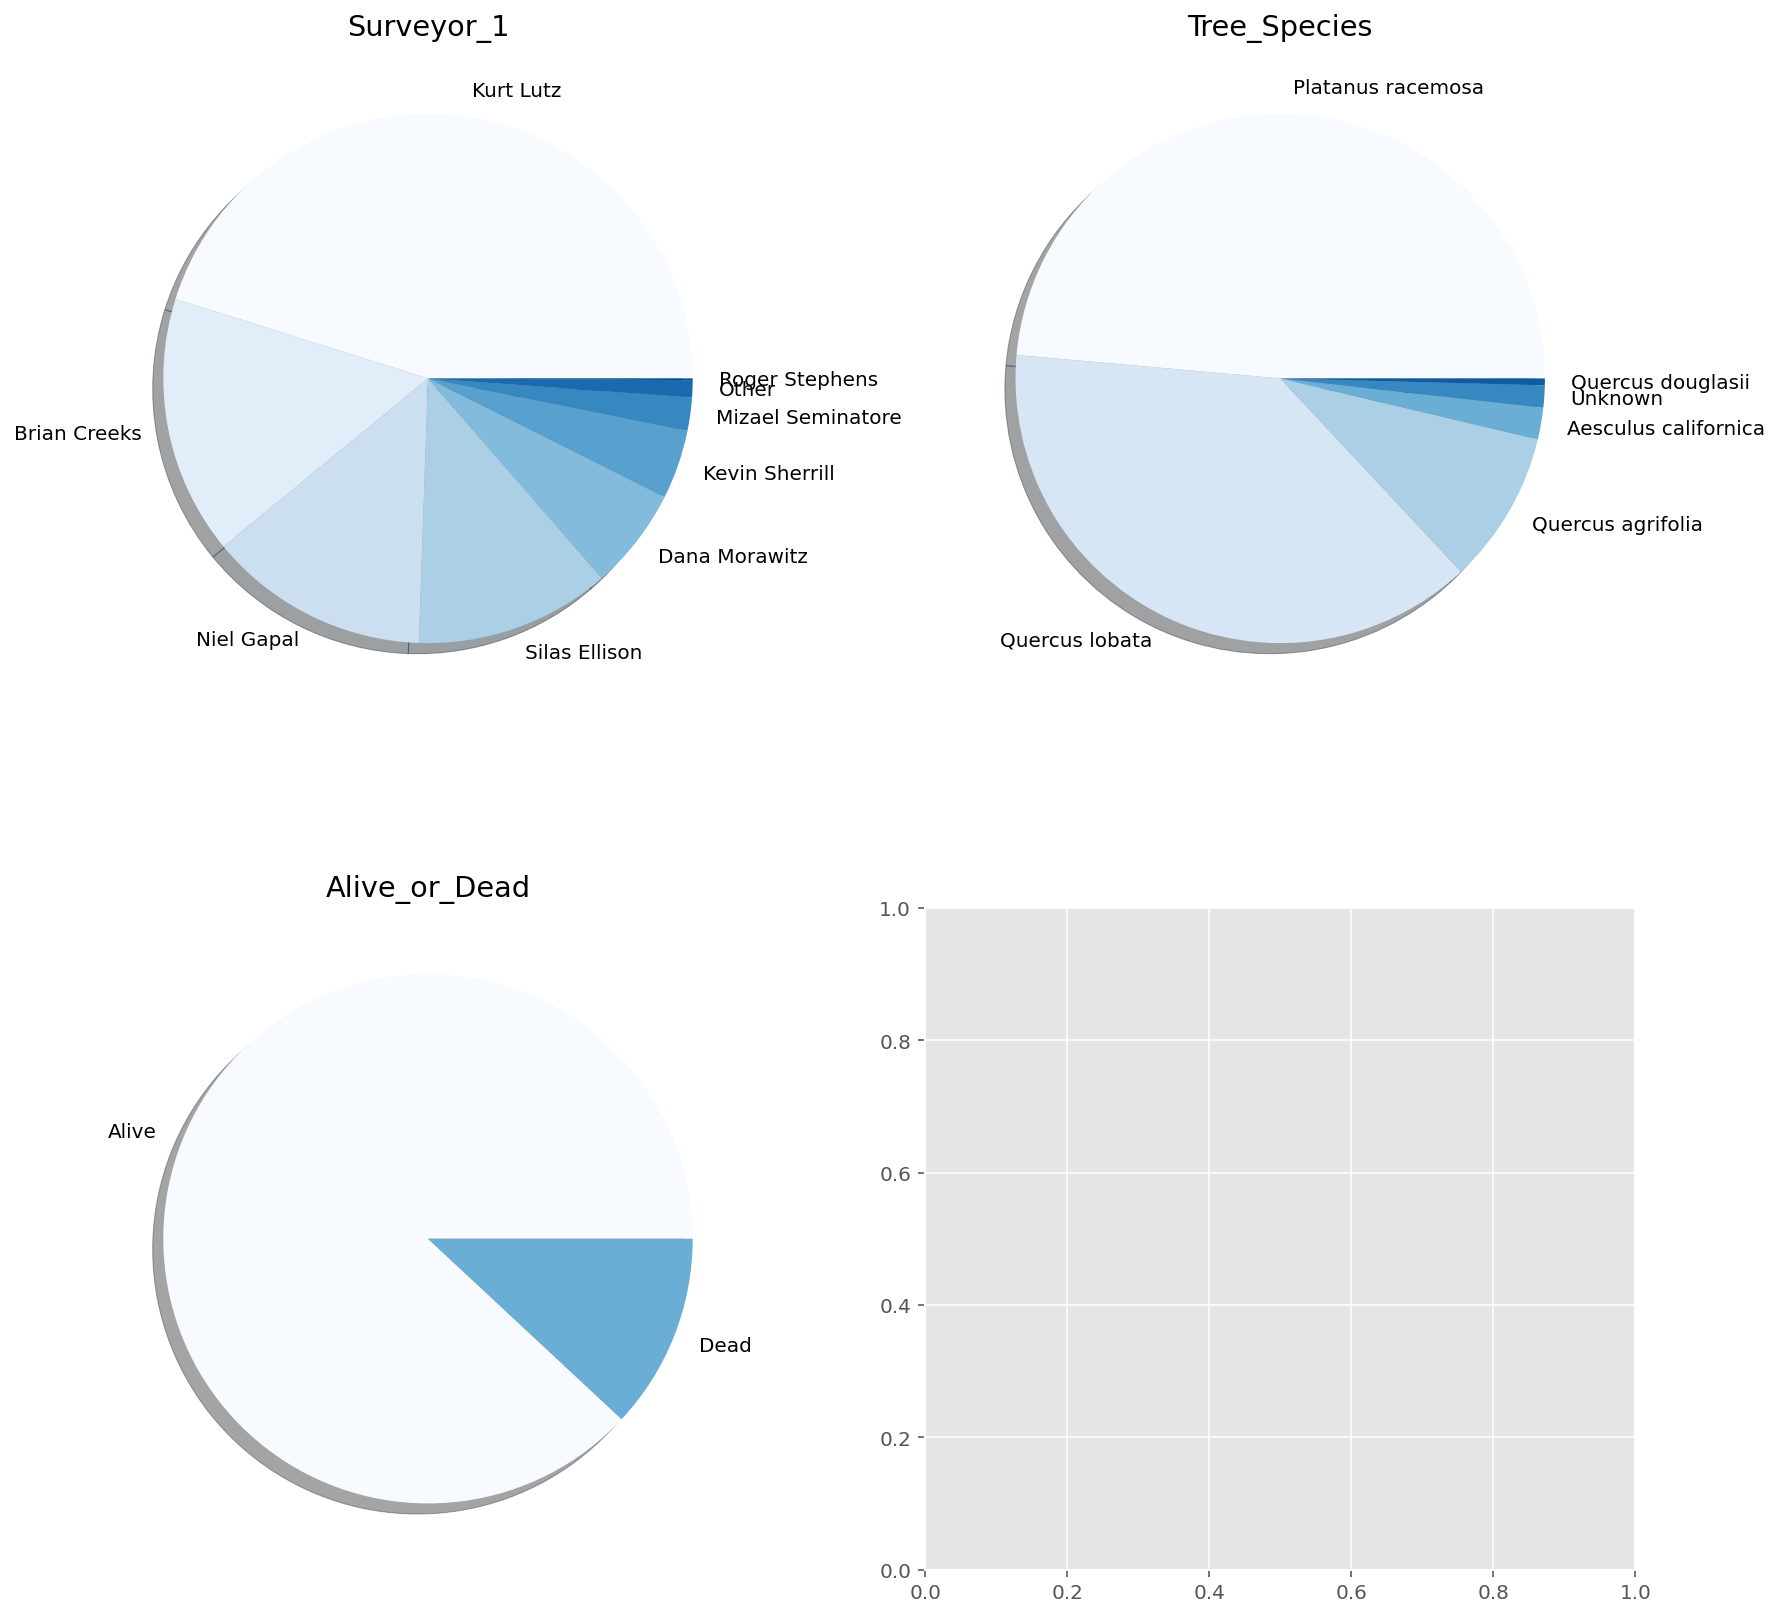

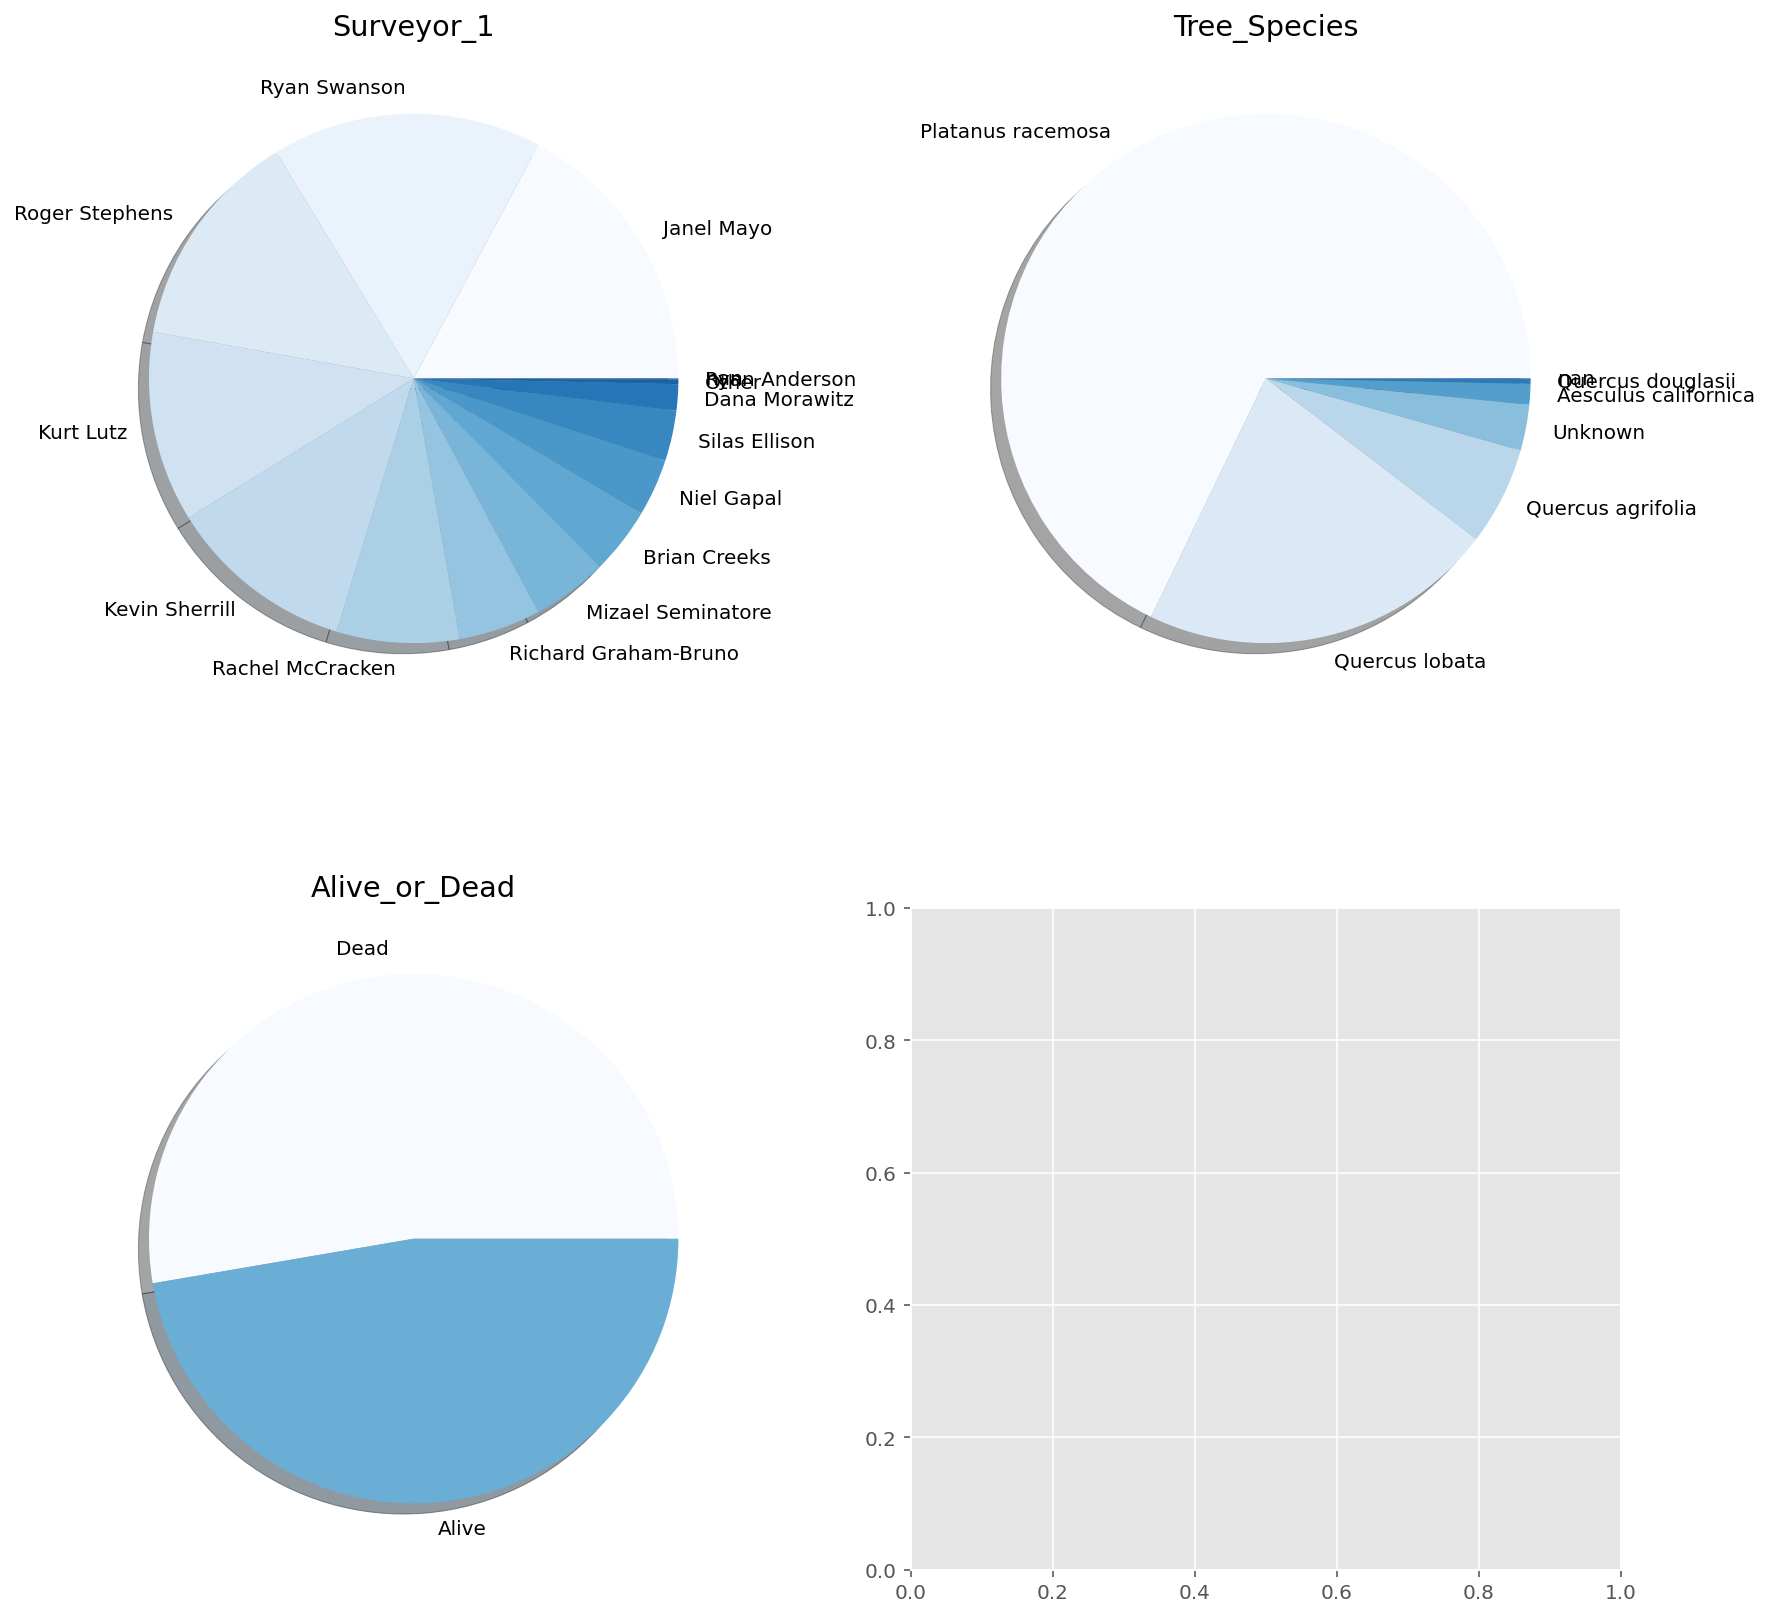

In [12]:
#Visualize data

QAQC_plot(sub,['Surveyor_1','Tree_Species','Alive_or_Dead'])

QAQC_plot(data,['Surveyor_1','Tree_Species','Alive_or_Dead'])

In [1]:
#QAQC Compare years

compare_years_catagorical(data, 'Alive_or_Dead', '2018-2019', '2020-2021')

NameError: name 'compare_years_catagorical' is not defined

Dropping surveyors with less than 95.9 observations
They did not make over 5% of total observation
Dropping Surveyors: ['Kevin Sherrill' 'Mizael Seminatore' 'Other' 'Roger Stephens']


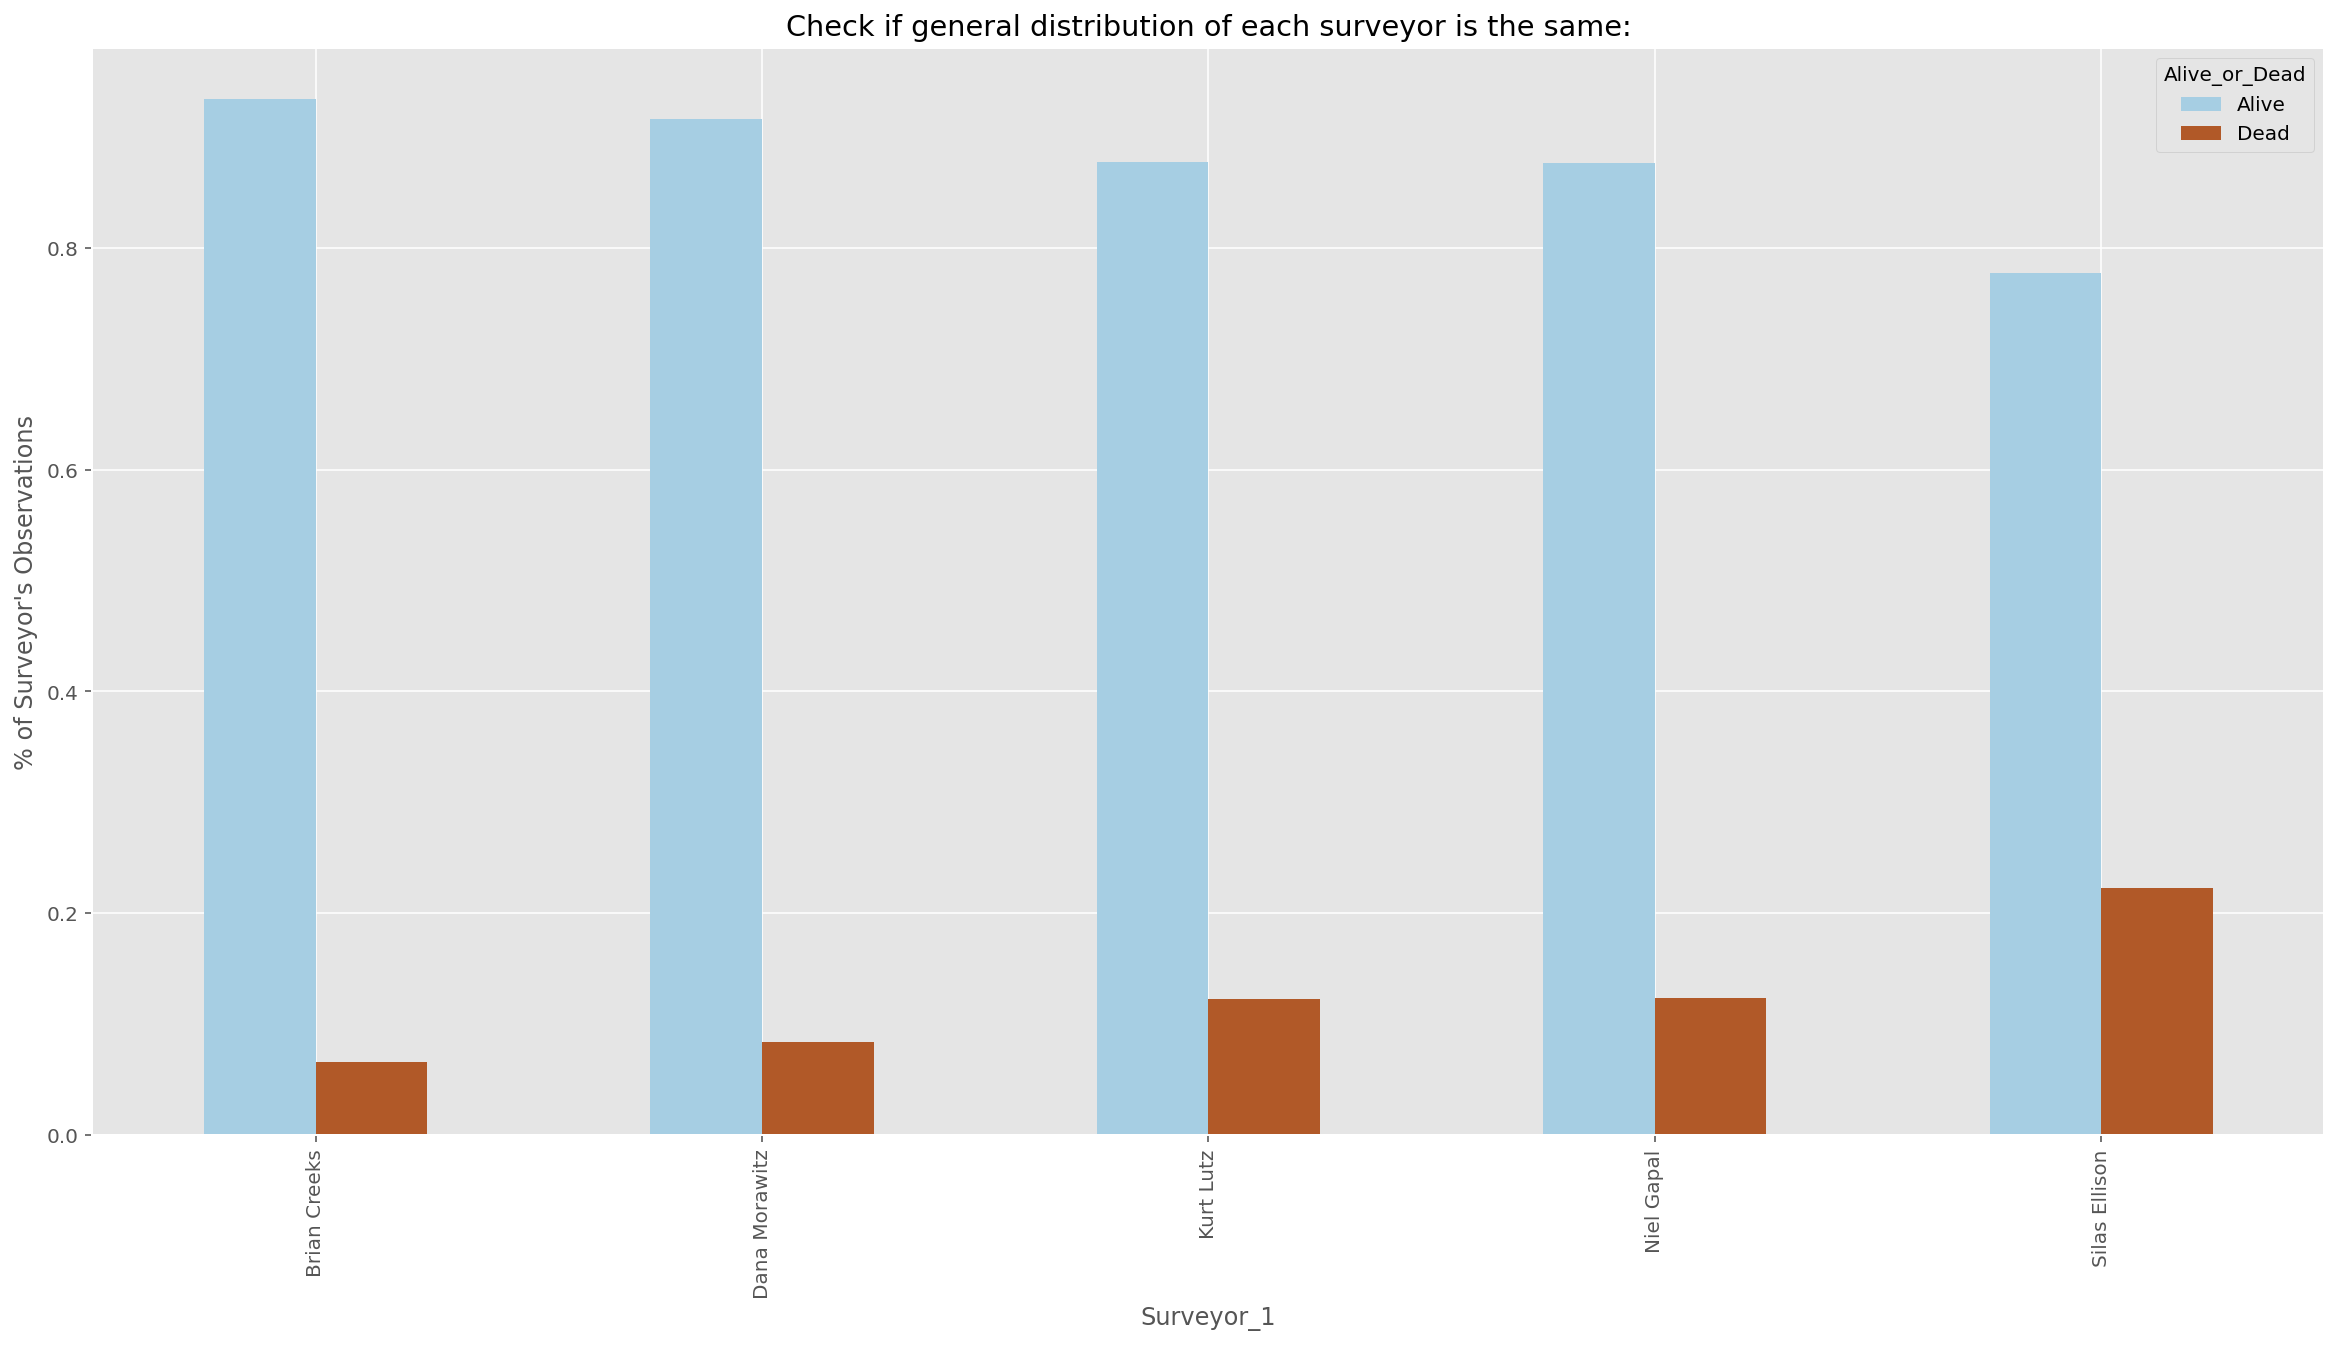

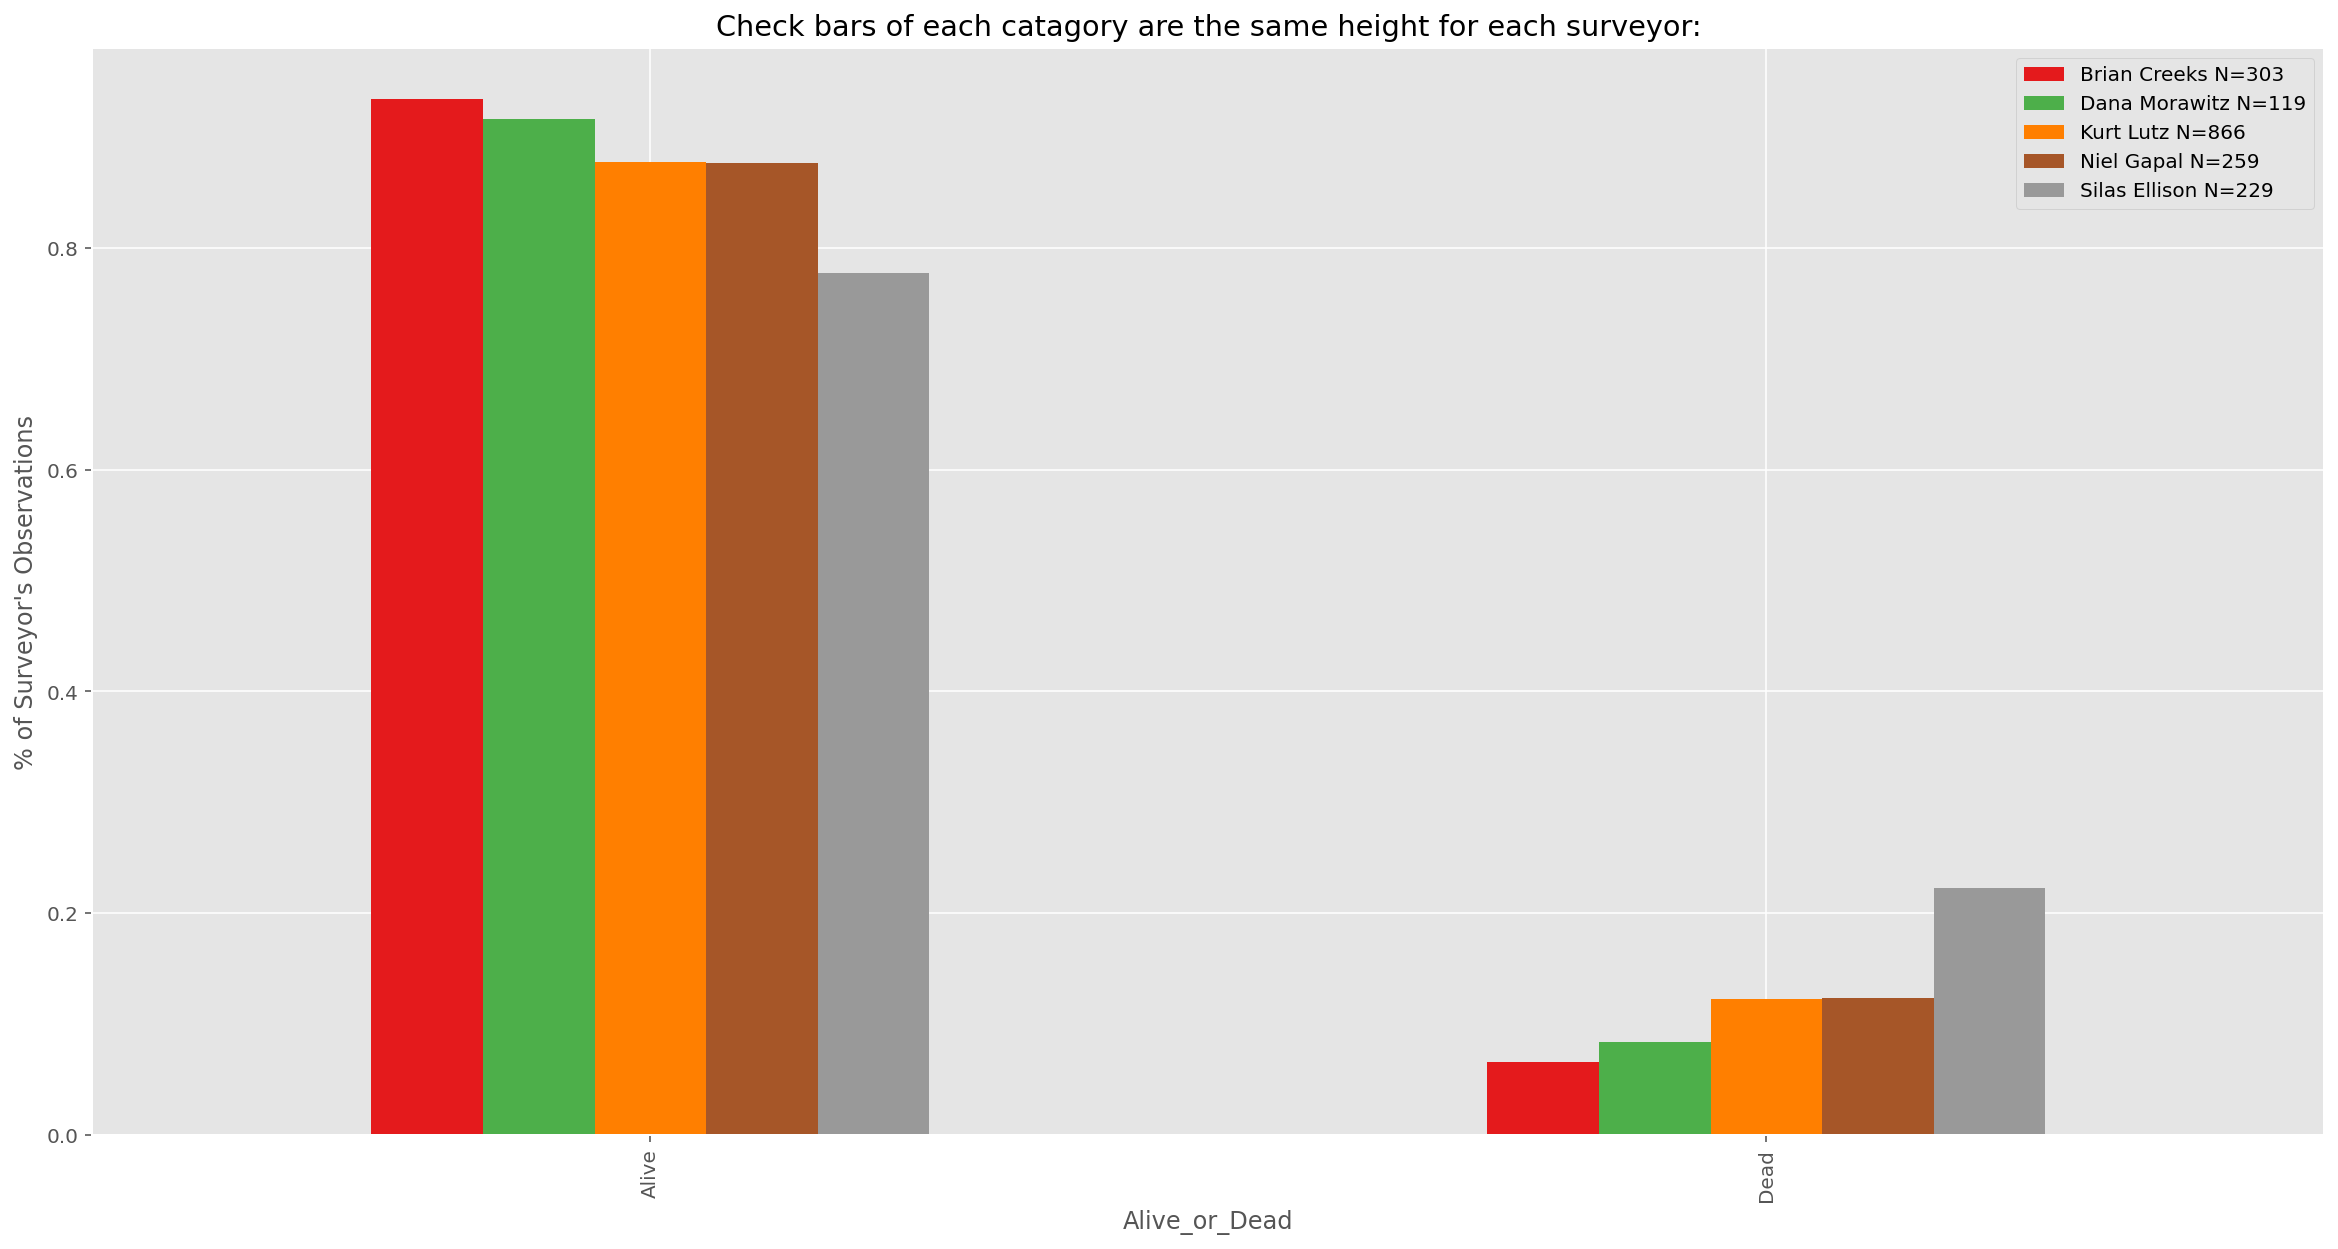

In [21]:
compare_surveyors(sub, 'Alive_or_Dead', 'Surveyor_1', 5)


In [24]:
#Check for GPS accuracy above 10ft error

QAQC_gps(data, 10)

No entries above spatial error threshold
